In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
df_batting = pd.read_csv (r'E:\Springboard\mlb_batting_active_pos_players.csv')
df_teams = pd.read_csv (r'E:\Springboard\MLB_2021_Team_Stats.csv')
print(df_batting.info())
print(df_batting.describe())
print(df_teams.info())
print(df_teams.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player name  3608 non-null   object 
 1   Year         3608 non-null   int64  
 2   Age          3608 non-null   int64  
 3   Tm           3608 non-null   object 
 4   Lg           3608 non-null   object 
 5   G            3608 non-null   int64  
 6   PA           3608 non-null   int64  
 7   AB           3608 non-null   int64  
 8   R            3608 non-null   int64  
 9   H            3608 non-null   int64  
 10  2B           3608 non-null   int64  
 11  3B           3608 non-null   int64  
 12  HR           3608 non-null   int64  
 13  RBI          3608 non-null   int64  
 14  SB           3608 non-null   int64  
 15  CS           3608 non-null   int64  
 16  BB           3608 non-null   int64  
 17  SO           3608 non-null   int64  
 18  BA           3597 non-null   float64
 19  OBP   

In [3]:
df_teams.columns

Index(['TEAM', 'GP', 'W', 'L', 'ERA', 'SV', 'CG', 'SHO', 'QS', 'IP', 'H', 'ER',
       'HR', 'BB', 'SO', 'OBA', 'WHIP', 'AB', 'R', 'H.1', '2B', '3B', 'HR.1',
       'RBI', 'TB', 'BB.1', 'SO.1', 'SB', 'AVG', 'OBP', 'SLG', 'OPS'],
      dtype='object')

In [4]:
df_teams


,TEAM,GP,W,L,ERA,SV,CG,SHO,QS,IP,...,HR.1,RBI,TB,BB.1,SO.1,SB,AVG,OBP,SLG,OPS
0,Los Angeles Dodgers,162,106,56,3.01,56,1,17,74,"1,452.00",...,237,799,"2,336",613,"1,408",65,0.244,0.330,0.429,0.759
1,San Francisco Giants,162,107,55,3.24,56,2,2,0,"1,455.00",...,241,768,"2,404",602,"1,461",66,0.249,0.329,0.440,0.769
2,Milwaukee Brewers,162,95,67,3.50,44,2,19,70,"1,436.00",...,194,700,"2,124",586,"1,465",82,0.233,0.317,0.396,0.713
3,Tampa Bay Rays,162,100,62,3.67,42,1,0,0,"1,455.20",...,222,810,"2,359",585,"1,542",88,0.242,0.321,0.428,0.749
4,Chicago White Sox,162,93,69,3.73,43,4,13,57,"1,403.10",...,190,757,"2,262",586,"1,389",57,0.256,0.336,0.422,0.758
5,New York Yankees,162,92,70,3.74,47,3,2,0,"1,435.10",...,222,666,"2,169",621,"1,482",63,0.237,0.322,0.407,0.729
6,Houston Astros,162,95,67,3.76,34,2,8,66,"1,445.00",...,221,834,"2,486",569,"1,222",53,0.267,0.339,0.444,0.783
7,Atlanta Braves,161,88,73,3.88,40,2,2,0,"1,410.20",...,239,762,"2,333",549,"1,453",59,0.244,0.319,0.435,0.754
8,New York Mets,162,77,85,3.90,41,2,1,0,"1,379.10",...,176,604,"2,034",495,"1,392",54,0.238,0.314,0.390,0.705
9,Toronto Blue Jays,162,91,71,3.91,34,1,14,68,"1,405.10",...,262,816,"2,552",496,"1,218",81,0.266,0.330,0.466,0.797


In [5]:
df_batting.drop('Unnamed: 29', inplace=True, axis=1)
df_batting.columns

Index(['player name', 'Year', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB'],
      dtype='object')

In [6]:
df_batting

,player name,Year,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,Jos� Abreu,2014,27,CHW,AL,145,622,556,80,176,...,0.383,0.581,0.964,173.0,323,14,11,0,4,15
1,Jos� Abreu,2015,28,CHW,AL,154,668,613,88,178,...,0.347,0.502,0.850,135.0,308,16,15,0,1,11
2,Jos� Abreu,2016,29,CHW,AL,159,695,624,67,183,...,0.353,0.468,0.820,124.0,292,21,15,0,9,7
3,Jos� Abreu,2017,30,CHW,AL,156,675,621,95,189,...,0.354,0.552,0.906,141.0,343,21,15,0,4,6
4,Jos� Abreu,2018,31,CHW,AL,128,553,499,68,132,...,0.325,0.473,0.798,117.0,236,14,11,0,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,Mike Zunino,2017,26,SEA,AL,124,435,387,52,97,...,0.331,0.509,0.840,125.0,197,8,8,0,1,0
3604,Mike Zunino,2018,27,SEA,AL,113,405,373,37,75,...,0.259,0.410,0.669,85.0,153,7,6,0,2,0
3605,Mike Zunino,2019,28,TBR,AL,90,289,266,30,44,...,0.232,0.312,0.544,46.0,83,4,3,0,0,0
3606,Mike Zunino,2020,29,TBR,AL,28,84,75,8,11,...,0.238,0.360,0.598,67.0,27,0,3,0,0,0


In [7]:
Rangers = df_batting['Tm'] == 'TEX'
df_rangers = df_batting[Rangers]
df_rangers

,player name,Year,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
63,Hanser Alberto,2015,22,TEX,AL,41,104,99,12,22,...,0.238,0.263,0.500,35.0,26,2,0,3,0,0
64,Hanser Alberto,2016,23,TEX,AL,35,58,56,2,8,...,0.143,0.161,0.304,-20.0,9,1,0,2,0,0
65,Hanser Alberto,2018,25,TEX,AL,13,30,27,0,5,...,0.241,0.259,0.501,33.0,7,0,0,1,0,0
147,Elvis Andrus,2009,20,TEX,AL,145,541,480,72,128,...,0.329,0.373,0.702,82.0,179,4,6,12,3,0
148,Elvis Andrus,2010,21,TEX,AL,148,674,588,88,156,...,0.342,0.301,0.643,72.0,177,6,5,17,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,Jose Trevino,2020,27,TEX,AL,24,83,76,10,19,...,0.280,0.434,0.715,92.0,33,1,1,1,2,0
3284,Jose Trevino,2021,28,TEX,AL,72,243,229,17,52,...,0.253,0.319,0.572,57.0,73,10,0,2,3,0
3504,Eli White,2020,26,TEX,AL,19,52,48,5,9,...,0.231,0.229,0.460,27.0,11,0,0,0,1,0
3505,Eli White,2021,27,TEX,AL,64,220,198,26,35,...,0.259,0.308,0.567,56.0,61,2,4,0,0,0


In [8]:
AL_division = df_batting['Lg'] == 'AL'
NL_division = df_batting['Lg'] == 'NL'
AL_players = df_batting[AL_division]
NL_players = df_batting[NL_division]
AL_players

,player name,Year,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
0,Jos� Abreu,2014,27,CHW,AL,145,622,556,80,176,...,0.383,0.581,0.964,173.0,323,14,11,0,4,15
1,Jos� Abreu,2015,28,CHW,AL,154,668,613,88,178,...,0.347,0.502,0.850,135.0,308,16,15,0,1,11
2,Jos� Abreu,2016,29,CHW,AL,159,695,624,67,183,...,0.353,0.468,0.820,124.0,292,21,15,0,9,7
3,Jos� Abreu,2017,30,CHW,AL,156,675,621,95,189,...,0.354,0.552,0.906,141.0,343,21,15,0,4,6
4,Jos� Abreu,2018,31,CHW,AL,128,553,499,68,132,...,0.325,0.473,0.798,117.0,236,14,11,0,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,Mike Zunino,2017,26,SEA,AL,124,435,387,52,97,...,0.331,0.509,0.840,125.0,197,8,8,0,1,0
3604,Mike Zunino,2018,27,SEA,AL,113,405,373,37,75,...,0.259,0.410,0.669,85.0,153,7,6,0,2,0
3605,Mike Zunino,2019,28,TBR,AL,90,289,266,30,44,...,0.232,0.312,0.544,46.0,83,4,3,0,0,0
3606,Mike Zunino,2020,29,TBR,AL,28,84,75,8,11,...,0.238,0.360,0.598,67.0,27,0,3,0,0,0


In [9]:
NL_players

,player name,Year,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
8,Ronald Acuna Jr.,2018,20,ATL,NL,111,487,433,78,127,...,0.366,0.552,0.917,143.0,239,4,6,0,3,2
9,Ronald Acuna Jr.,2019,21,ATL,NL,156,715,626,127,175,...,0.365,0.518,0.883,119.0,324,8,9,0,1,4
10,Ronald Acuna Jr.,2020,22,ATL,NL,46,202,160,46,40,...,0.406,0.581,0.987,153.0,93,3,4,0,0,2
11,Ronald Acuna Jr.,2021,23,ATL,NL,82,360,297,72,84,...,0.394,0.596,0.990,154.0,177,0,9,0,5,2
16,Willy Adames,2021,25,MIL,NL,83,347,306,51,89,...,0.375,0.536,0.911,143.0,164,6,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,Ryan Zimmerman,2016,31,WSN,NL,115,467,427,60,93,...,0.272,0.370,0.642,67.0,158,12,5,0,6,1
3595,Ryan Zimmerman,2017,32,WSN,NL,144,576,524,90,159,...,0.358,0.573,0.930,134.0,300,16,3,0,5,1
3596,Ryan Zimmerman,2018,33,WSN,NL,85,323,288,33,76,...,0.337,0.486,0.824,114.0,140,10,3,0,2,1
3597,Ryan Zimmerman,2019,34,WSN,NL,52,190,171,20,44,...,0.321,0.415,0.736,90.0,71,4,0,0,2,0


In [10]:
current_rangers = df_batting['Year'] == 2021
df_current_rangers = df_batting[(Rangers) & (current_rangers)]
df_current_rangers

,player name,Year,Age,Tm,Lg,G,PA,AB,R,H,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
506,Willie Calhoun,2021,26,TEX,AL,59,226,205,23,52,...,0.323,0.385,0.708,95.0,79,3,2,0,0,0
731,Charlie Culberson,2021,32,TEX,AL,77,234,212,20,53,...,0.304,0.382,0.686,88.0,81,3,2,4,1,1
748,David Dahl,2021,27,TEX,AL,63,220,205,19,43,...,0.247,0.322,0.569,55.0,66,3,1,1,3,0
773,Khris Davis,2021,33,TEX,AL,22,61,51,8,8,...,0.262,0.333,0.596,63.0,17,2,0,0,2,0
857,Ryan Dorow,2021,25,TEX,AL,2,4,3,0,0,...,0.250,0.000,0.250,-21.0,0,0,0,0,0,0
1107,Joey Gallo,2021,27,TEX,AL,95,388,310,57,69,...,0.379,0.490,0.869,137.0,152,3,4,0,0,4
1131,Adolis Garc�a,2021,28,TEX,AL,119,494,463,65,117,...,0.296,0.495,0.790,112.0,229,9,4,0,2,0
1334,Ronald Guzman,2021,26,TEX,AL,7,17,16,1,1,...,0.118,0.250,0.368,-3.0,4,0,0,0,0,0
1415,Jonah Heim,2021,26,TEX,AL,68,230,216,19,45,...,0.245,0.370,0.615,66.0,80,7,1,1,2,0
1461,Yonny Hernandez,2021,23,TEX,AL,18,72,63,8,17,...,0.347,0.317,0.665,86.0,20,0,4,0,1,0


In [11]:
df_current_rangers.columns

Index(['player name', 'Year', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB'],
      dtype='object')

In [12]:
Q1 = df_batting.quantile(.05)
Q3 = df_batting.quantile(.95)
IQR = Q3-Q1
print(IQR)

Year     10.0000
Age      11.0000
G       151.0000
PA      652.0000
AB      577.6500
R        91.6500
H       165.0000
2B       35.0000
3B        5.0000
HR       30.0000
RBI      90.6500
SB       18.0000
CS        6.0000
BB       70.0000
SO      136.0000
BA        0.2090
OBP       0.2180
SLG       0.4270
OPS       0.6002
OPS+    156.2000
TB      281.0000
GDP      16.0000
HBP       9.0000
SH        4.0000
SF        6.0000
IBB       7.0000
dtype: float64


<AxesSubplot:>

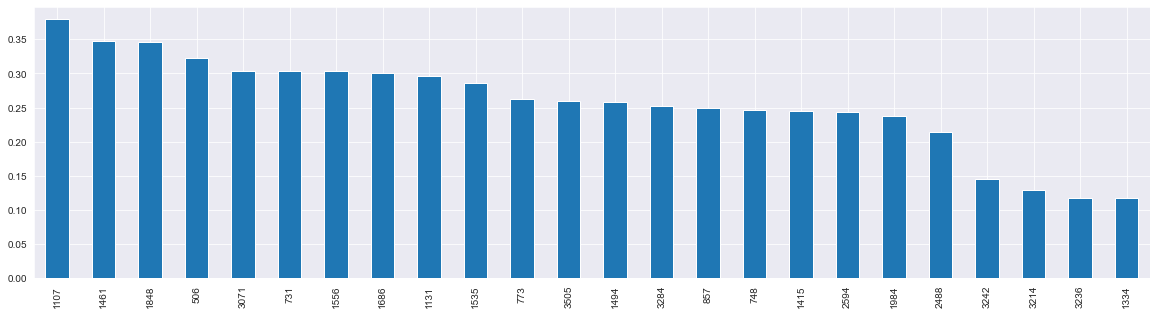

In [13]:
rangers_obp = df_current_rangers['OBP']
rangers_obp.sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='OBP', ylabel='player name'>

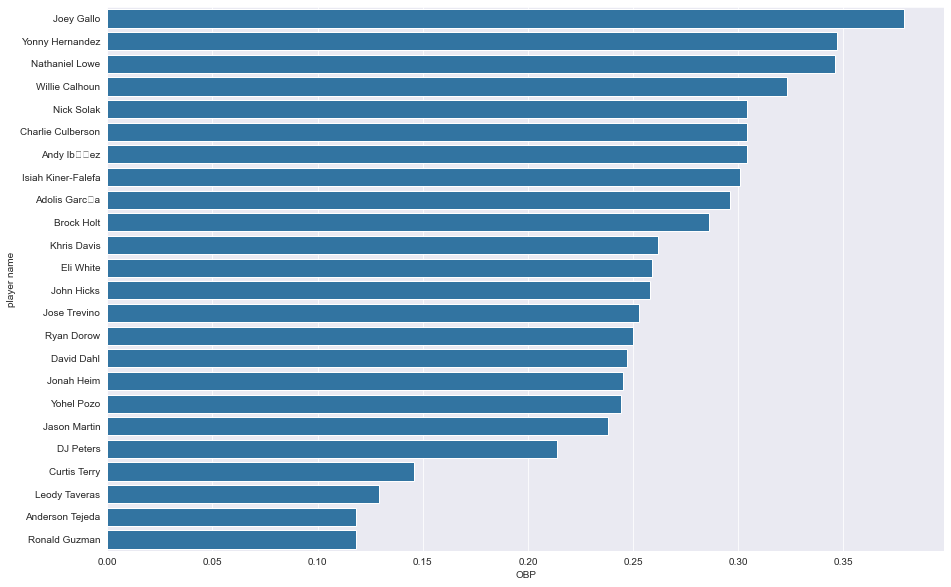

In [19]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(x='OBP',y='player name', data=df_current_rangers.sort_values(by='OBP',ascending=False), color='tab:blue',ax=ax)


In [15]:
mod_df_batting = df_batting
mod_df_batting.drop('Year', inplace=True, axis=1)
mod_df_batting.drop('Age', inplace=True, axis=1)
mod_df_batting.drop('G', inplace=True, axis=1)
mod_df_batting.drop('SB', inplace=True, axis=1)
mod_df_batting.drop('CS', inplace=True, axis=1)
mod_df_batting.drop('OPS+', inplace=True, axis=1)
mod_df_batting.drop('TB', inplace=True, axis=1)
mod_df_batting.drop('GDP', inplace=True, axis=1)
mod_df_batting.drop('HBP', inplace=True, axis=1)
mod_df_batting.drop('SH', inplace=True, axis=1)
mod_df_batting.drop('SF', inplace=True, axis=1)
mod_df_batting.drop('IBB', inplace=True, axis=1)
mod_df_batting.columns

Index(['player name', 'Tm', 'Lg', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS'],
      dtype='object')

Text(0.5, 1.0, 'Correlational Heat Map')

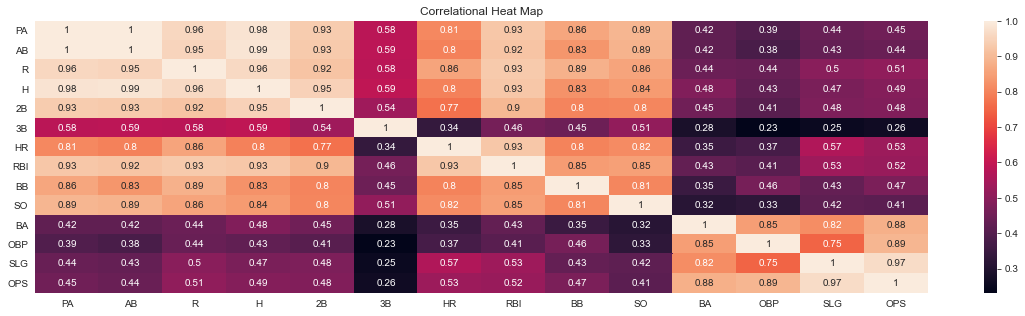

In [16]:
correlated_df_batting = mod_df_batting.corr()
sns.heatmap(correlated_df_batting, annot=True).set_title('Correlational Heat Map')

In [20]:
df_teams.columns

Index(['TEAM', 'GP', 'W', 'L', 'ERA', 'SV', 'CG', 'SHO', 'QS', 'IP', 'H', 'ER',
       'HR', 'BB', 'SO', 'OBA', 'WHIP', 'AB', 'R', 'H.1', '2B', '3B', 'HR.1',
       'RBI', 'TB', 'BB.1', 'SO.1', 'SB', 'AVG', 'OBP', 'SLG', 'OPS'],
      dtype='object')

In [21]:
mod_df_teams = df_teams
mod_df_teams.drop('GP', inplace=True, axis=1)
mod_df_teams.drop('ERA', inplace=True, axis=1)
mod_df_teams.drop('SV', inplace=True, axis=1)
mod_df_teams.drop('CG', inplace=True, axis=1)
mod_df_teams.drop('SHO', inplace=True, axis=1)
mod_df_teams.drop('QS', inplace=True, axis=1)
mod_df_teams.drop('IP', inplace=True, axis=1)
mod_df_teams.drop('H', inplace=True, axis=1)
mod_df_teams.drop('ER', inplace=True, axis=1)
mod_df_teams.drop('HR', inplace=True, axis=1)
mod_df_teams.drop('BB', inplace=True, axis=1)
mod_df_teams.drop('SO', inplace=True, axis=1)
mod_df_teams.drop('OBA', inplace=True, axis=1)
mod_df_teams.drop('WHIP', inplace=True, axis=1)


Text(0.5, 1.0, 'Correlational Heat Map')

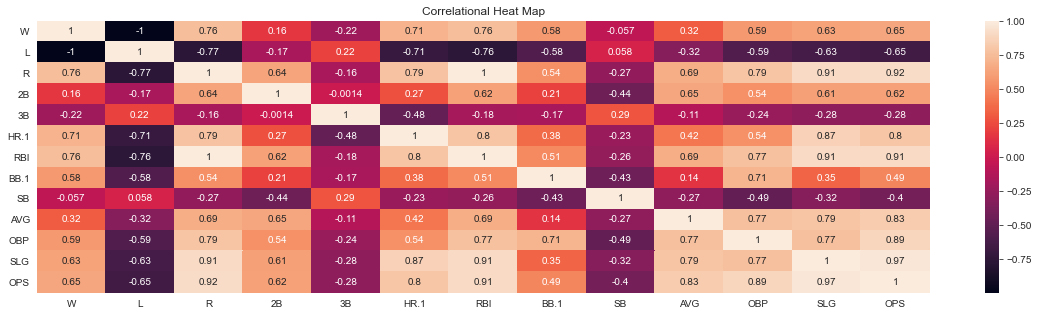

In [22]:
correlated_df_teams = mod_df_teams.corr()
sns.heatmap(correlated_df_teams, annot=True).set_title('Correlational Heat Map')

In [17]:
#x variable (independent)
#x_raw = df_raw[ListOfVariables]
#y variable (dependent)
#y_raw = df_raw['PUMP FAILURE (1 or 0)']
#constant to x variable
#x_raw_constant = sm.add_constant(x_raw)
#OLS regression
#regression_model_raw = sm.OLS(y_raw, x_raw_constant).fit()
#print(regression_model_raw.summary())

In [18]:
import warnings
warnings.filterwarnings('ignore')